# Jupyter-Notebook for Machine Learning on Emission Data

Jupyter Notebook is an interactive web application for developing and running Python code. 
Also data visualization is possible. 

#### Load Packages: 

In [1]:
import time
import numpy as np                 # package for numerics
import pandas as pd                # package for data frames  
import matplotlib.pyplot as plt    # package for plotting                     

# Machine Learning Packages (scikit-learn):
from sklearn.svm import SVR                           # Support Vector Machine
from sklearn.ensemble import RandomForestRegressor    # Random Forest
from sklearn.linear_model import Ridge                # Linear Regression (with Regularisation)
from sklearn.preprocessing import PolynomialFeatures  # for Linear Regression with Polynoms
from sklearn.neural_network import MLPRegressor       # Neural Net

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error as mae # Metric 
from sklearn.metrics import r2_score                   # Metric

#### Display style for figures: 

In [2]:
# inline:   small, non-inteactive
# notebook: larger, interactive (zoom etc)
%matplotlib inline 
# %matplotlib notebook 

#### Load preprocessed data from text file (csv) into a "data frame":

In [3]:
#df = pd.read_csv("data_method_1.dat", sep = " ")   # Import data
df = pd.read_csv("data_method_4.dat", sep = " ")   # Import data

df.drop(["t"], axis = 1, inplace = True)

print(df.shape)

df.head()

(6699, 14)


,Temp,dt,vW,method,ef,wd,lg_ef,season4,h_sin,h_cos,t_sin,t_cos,dW_sin,dW_cos
0,13.175000,01NOV2016:11:00:00,2.134214,4,0.637836,W,-0.449675,2,2.588190e-01,-0.965926,0.0,1.0,-0.999999,0.001241
1,12.100000,01NOV2016:12:00:00,2.636442,4,1.025845,W,0.025517,2,1.224647e-16,-1.000000,0.0,1.0,-0.887852,0.460130
2,11.891667,01NOV2016:13:00:00,3.602638,4,1.536756,W,0.429674,2,-2.588190e-01,-0.965926,0.0,1.0,-0.723579,0.690241
3,11.833333,01NOV2016:14:00:00,2.994724,4,2.530530,W,0.928429,2,-5.000000e-01,-0.866025,0.0,1.0,-0.719382,0.694614
4,11.166667,01NOV2016:15:00:00,2.947266,4,1.543225,W,0.433874,2,-7.071068e-01,-0.707107,0.0,1.0,-0.778862,0.627195


#### We have to consider, that the data have a chronological order. To do so, we group them in 40 sequences of 1 weeks

In [4]:
# List with column "method" of data_frame df for indexing
method = df["method"]

# grouping data in 40 intervals of 1 week:
if (method[0] == 1): 

    nn = [144, 160, 167, 168, 166, 167, 168, 167, 168, 166, 168, 160, 167, 167, 168, 168, 165, 167, 164, 167, 
          165, 187, 133, 167, 167, 167, 167, 144, 166, 168, 166, 152,  56,  72,  67, 157, 166, 111, 114, 165]

elif (method[0] == 4):     
    
    nn = [145, 166, 168, 167, 167, 168, 168, 168, 168, 167, 168, 163, 168, 167, 168, 168, 162, 167, 168, 168,  
          166, 189, 146, 168, 168, 168, 168, 159, 168, 168, 168, 168, 167, 168, 168, 168, 168, 167, 167, 203]

else: 
    print("wrong method number")


groups = [0]*nn[0]+[1]*nn[1]+[2]*nn[2]+[3]*nn[3]+[4]*nn[4]+[5]*nn[5]+[6]*nn[6]+[7]*nn[7]+[8]*nn[8]\
    +[9]*nn[9]+[10]*nn[10]+[11]*nn[11]+[12]*nn[12]+[13]*nn[13]+[14]*nn[14]+[15]*nn[15]+[16]*nn[16]\
    +[17]*nn[17]+[18]*nn[18]+[19]*nn[19]+[20]*nn[20]+[21]*nn[21]+[22]*nn[22]+[23]*nn[23]+[24]*nn[24]\
    +[25]*nn[25]+[26]*nn[26]+[27]*nn[27]+[28]*nn[28]+[29]*nn[29]+[30]*nn[30]+[31]*nn[31]+[32]*nn[32]\
    +[33]*nn[33]+[34]*nn[34]+[35]*nn[35]+[36]*nn[36]+[37]*nn[37]+[38]*nn[38]+[39]*nn[39]

df["group"] = groups

groups   = df["group"].values
n_splits = max(df["group"].values) - min(df["group"].values) + 1

df.head()


# additional coloumn in data frame:
df["group"] = groups

groups = df["group"].values

# for cross-validation:
n_splits = max(df["group"].values) - min(df["group"].values) + 1

df.head()

,Temp,dt,vW,method,ef,wd,lg_ef,season4,h_sin,h_cos,t_sin,t_cos,dW_sin,dW_cos,group
0,13.175000,01NOV2016:11:00:00,2.134214,4,0.637836,W,-0.449675,2,2.588190e-01,-0.965926,0.0,1.0,-0.999999,0.001241,0
1,12.100000,01NOV2016:12:00:00,2.636442,4,1.025845,W,0.025517,2,1.224647e-16,-1.000000,0.0,1.0,-0.887852,0.460130,0
2,11.891667,01NOV2016:13:00:00,3.602638,4,1.536756,W,0.429674,2,-2.588190e-01,-0.965926,0.0,1.0,-0.723579,0.690241,0
3,11.833333,01NOV2016:14:00:00,2.994724,4,2.530530,W,0.928429,2,-5.000000e-01,-0.866025,0.0,1.0,-0.719382,0.694614,0
4,11.166667,01NOV2016:15:00:00,2.947266,4,1.543225,W,0.433874,2,-7.071068e-01,-0.707107,0.0,1.0,-0.778862,0.627195,0


In [5]:
df.shape

(6699, 15)

#### For Machine Learning we need a matrix X of features and vector y of target-values (group is not a feature!).  

In [6]:
# Create feature matrix X (input-data) and target vector y (output-values): 
# numpy-array
#X = df.drop(["dt", "method", "ef", "wd", "lg_ef", "season1", "season2", "season3", "group"], axis = 1).values 

X = df.drop(["dt", "method", "ef", "wd", "lg_ef", "group"], axis = 1).values  

y = df["lg_ef"].values  

print("X.shape:  ", X.shape)
print("y.shape:  ", y.shape)

X.shape:   (6699, 9)
y.shape:   (6699,)


### cross_val_predict( estimator, X, y, groups, cv, n_jobs )

Generate cross-validated estimates for each input data point. 

The data is split according to the cross_val-parameter. 

Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

## Linear Regression (multivariate) 

 
Linear Regression, MAE-Score:    0.355964
Linear Regression,  R2-Score:    0.4784
 
Linear Regression, time (sec):   0.7917


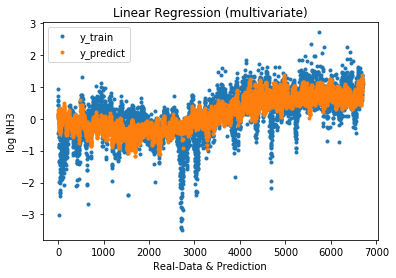

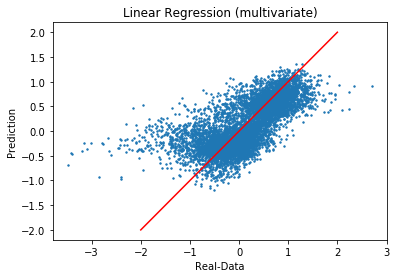

In [7]:
# Ridge is a Linear Regression with Regularization (avoids overfitting)
# Ridge(solver='lsqr', alpha=130.) 

t_start = time.time()

model = make_pipeline( StandardScaler(), Ridge(solver='lsqr', alpha=130.) )  # with Normalization !!

# cross-validation generator 
gkf = GroupKFold(n_splits = n_splits)

y_pred_LR  = cross_val_predict(model, X, y, groups, cv = gkf, n_jobs = -1)

mae_LR = round(mae(y, y_pred_LR), 6)
r2_LR  = round(r2_score(y, y_pred_LR), 4)
t_LR   = round((time.time() - t_start), 4)

print(" ")
print("Linear Regression, MAE-Score:   ", mae_LR)
print("Linear Regression,  R2-Score:   ", r2_LR)
print(" ")
print("Linear Regression, time (sec):  ", t_LR)

plt.figure()
plt.plot(y, '.', label='y_train')
plt.plot(y_pred_LR, '.', label='y_predict')
plt.xlabel("Real-Data & Prediction")
plt.ylabel("log NH3")
plt.title("Linear Regression (multivariate)")
plt.legend()
plt.show()

plt.figure()
plt.scatter(y, y_pred_LR, s=2.0)
plt.plot([-2, 2.], [-2, 2.], 'r')
plt.xlabel("Real-Data")
plt.ylabel("Prediction")
plt.title("Linear Regression (multivariate)")
plt.show()

## Linear Regression with Polynoms (multivariate) 

 
Linear Regr. Poly, MAE-Score:    0.330987
Linear Regr. Poly,  R2-Score:    0.5617
 
Linear Regr. Poly, time (sec):   3.7363


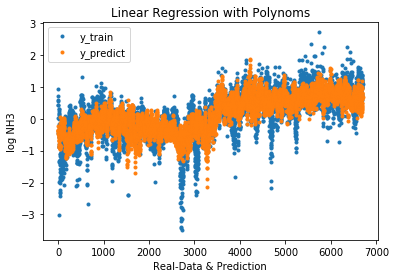

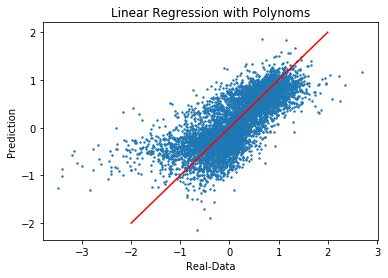

In [8]:
# Ridge(solver='lsqr', alpha = 930.)

t_start = time.time()

model = make_pipeline( StandardScaler(), Ridge(solver='lsqr', alpha = 130.) )  #930
poly  = PolynomialFeatures(degree = 3)

X_pol = poly.fit_transform(X)

y_pred_PLR  = cross_val_predict(model, X_pol, y, groups, cv = gkf, n_jobs = -1)

mae_LRP = round(mae(y, y_pred_PLR), 6)
r2_LRP  = round(r2_score(y, y_pred_PLR), 4)
t_LRP   = round((time.time() - t_start), 4)

print(" ")
print("Linear Regr. Poly, MAE-Score:   ", mae_LRP)
print("Linear Regr. Poly,  R2-Score:   ", r2_LRP)
print(" ")
print("Linear Regr. Poly, time (sec):  ", t_LRP)

plt.figure()
plt.plot(y, '.', label='y_train')
plt.plot(y_pred_PLR, '.', label='y_predict')
plt.xlabel("Real-Data & Prediction")
plt.ylabel("log NH3")
plt.title("Linear Regression with Polynoms")
plt.legend()
plt.show()

plt.figure()
plt.scatter(y, y_pred_PLR, s=2.0)
plt.plot([-2, 2.], [-2, 2.], 'r')
plt.xlabel("Real-Data")
plt.ylabel("Prediction")
plt.title("Linear Regression with Polynoms")
plt.show()

## Random Forest

 
Random Forest,     MAE-Score:    0.337125
Random Forest,      R2-Score:    0.5133
 
Random Forest,     time (sec):   45.0217


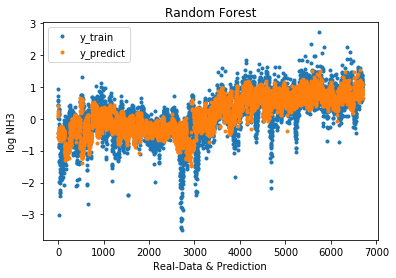

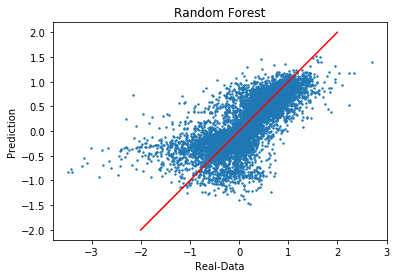

In [9]:
# RandomForestRegressor(n_estimators = 100, n_jobs = -1)   # mind. 100

t_start = time.time()

model = make_pipeline( StandardScaler(), RandomForestRegressor(n_estimators = 100, n_jobs = -1) )

gkf = GroupKFold(n_splits = n_splits)

y_pred_RF  = cross_val_predict(model, X, y, groups, cv = gkf)

mae_RF = round(mae(y, y_pred_RF), 6)
r2_RF  = round(r2_score(y, y_pred_RF), 4)
t_RF   = round((time.time() - t_start), 4)

print(" ")
print("Random Forest,     MAE-Score:   ", mae_RF)
print("Random Forest,      R2-Score:   ", r2_RF)
print(" ")
print("Random Forest,     time (sec):  ", t_RF)

plt.figure()
plt.plot(y, '.', label='y_train')
plt.plot(y_pred_RF, '.', label='y_predict')
plt.xlabel("Real-Data & Prediction")
plt.ylabel("log NH3")
plt.title("Random Forest")
plt.legend()
plt.show()

plt.figure()
plt.scatter(y, y_pred_RF, s=2.0)
plt.plot([-2, 2.], [-2, 2.], 'r')
plt.xlabel("Real-Data")
plt.ylabel("Prediction")
plt.title("Random Forest")
plt.show()

## Support Vector Machine (SVM)

 
Support Vect.Mach. MAE-Score:    0.328391
Support Vect.Mach.  R2-Score:    0.5354
 
Support Vect.Mach. time (sec):   53.2649


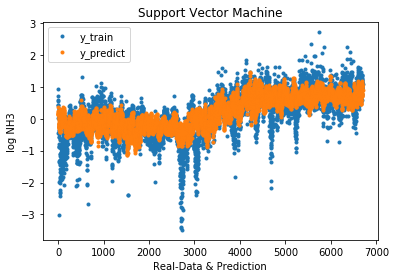

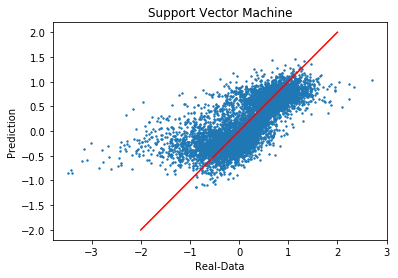

In [10]:
# SVR(kernel = 'rbf', C=0.38, gamma=0.034, epsilon=0.1)

t_start = time.time()

model = make_pipeline( StandardScaler(), SVR(kernel = 'rbf', C=0.38, gamma=0.034, epsilon=0.1) )

gkf = GroupKFold(n_splits = n_splits)

y_pred_SVM  = cross_val_predict(model, X, y, groups, cv = gkf) # , n_jobs = -1)

# n_jobs, the number of CPUs to use to do the computation. None means 1, -1 means using all processors.
# n_jobs = -1, causing problems for SVM

mae_SVM = round(mae(y, y_pred_SVM), 6)
r2_SVM  = round(r2_score(y, y_pred_SVM), 4)
t_SVM   = round((time.time() - t_start), 4)

print(" ")
print("Support Vect.Mach. MAE-Score:   ", mae_SVM)
print("Support Vect.Mach.  R2-Score:   ", r2_SVM)
print(" ")
print("Support Vect.Mach. time (sec):  ", t_SVM)

plt.figure()
plt.plot(y, '.', label='y_train')
plt.plot(y_pred_SVM, '.', label='y_predict')
plt.xlabel("Real-Data & Prediction")
plt.ylabel("log NH3")
plt.title("Support Vector Machine")
plt.legend()
plt.show()

plt.figure()
plt.scatter(y, y_pred_SVM, s=2.0)
plt.plot([-2, 2.], [-2, 2.], 'r')
plt.xlabel("Real-Data")
plt.ylabel("Prediction")
plt.title("Support Vector Machine")
plt.show()

## Artificial Neural Net (ANN)

 
Neural Net,        MAE-Score:    0.363121
Neural Net,         R2-Score:    0.4484
 
Neural Net,        time (sec):   149.9892


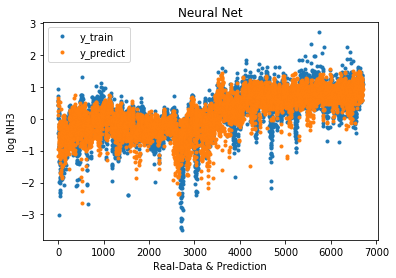

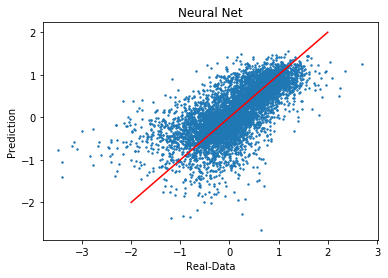

In [11]:
# MLPRegressor(hidden_layer_sizes = hls, shuffle=False, random_state=1)

t_start = time.time()

nds = 32   # nodes
hls =  (nds,nds,nds, nds,nds,nds, nds,nds,nds, nds)   # hidden layers

model = make_pipeline( StandardScaler(), MLPRegressor(hidden_layer_sizes = hls, shuffle=False, random_state=1) )

gkf = GroupKFold(n_splits = n_splits)

y_pred_ANN  = cross_val_predict(model, X, y, groups, cv = gkf, n_jobs = -1)

mae_ANN = round(mae(y, y_pred_ANN), 6)
r2_ANN  = round(r2_score(y, y_pred_ANN), 4)
t_ANN   = round((time.time() - t_start), 4)

print(" ")
print("Neural Net,        MAE-Score:   ", mae_ANN)
print("Neural Net,         R2-Score:   ", r2_ANN)
print(" ")
print("Neural Net,        time (sec):  ", t_ANN)

plt.figure()
plt.plot(y, '.', label='y_train')
plt.plot(y_pred_ANN, '.', label='y_predict')
plt.xlabel("Real-Data & Prediction")
plt.ylabel("log NH3")
plt.title("Neural Net")
plt.legend()
plt.show()

plt.figure()
plt.scatter(y, y_pred_ANN, s=2.0)
plt.plot([-2, 2.], [-2, 2.], 'r')
plt.xlabel("Real-Data")
plt.ylabel("Prediction")
plt.title("Neural Net")
plt.show()

In [12]:
print(" ")
print("Linear Regression,         MAE-Score:  ", mae_LR)
print("Linear Regression Polynom, MAE-Score:  ", mae_LRP)
print("Random Forest,             MAE-Score:  ", mae_RF)
print("Support Vector Machine,    MAE-Score:  ", mae_SVM)
print("Artificial Neural Net,     MAE-Score:  ", mae_ANN)

print(" ")
print("Linear Regression,         time (sec): ", t_LR)
print("Linear Regression Polynom, time (sec): ", t_LRP)
print("Random Forest,             time (sec): ", t_RF)
print("Support Vector Machine,    time (sec): ", t_SVM)
print("Artificial Neural Net,     time (sec): ", t_ANN)


 
Linear Regression,         MAE-Score:   0.355964
Linear Regression Polynom, MAE-Score:   0.330987
Random Forest,             MAE-Score:   0.337125
Support Vector Machine,    MAE-Score:   0.328391
Artificial Neural Net,     MAE-Score:   0.363121
 
Linear Regression,         time (sec):  0.7917
Linear Regression Polynom, time (sec):  3.7363
Random Forest,             time (sec):  45.0217
Support Vector Machine,    time (sec):  53.2649
Artificial Neural Net,     time (sec):  149.9892


### Which Method ist the best?  Which Method represents the best compromise between run-time and quality?

### Calculate Emissions pro animal and measuring period (10 month, 40 weeks): 

Unit of EF: g/LU*h  LU = Livestock-Unit, one 500kg-animal 

#### Calculation of measured emission factor in measuring period (40 weeks)

Method_1: Missing values in weeks: [ 32, 33, 34, 37, 38 ] Correction factors: [3.0, 2.4, 2.4, 1.5, 1.5]

Method_4: only few missing data, no correction.

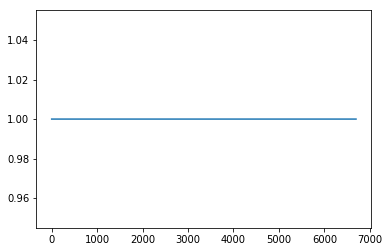

In [14]:
corr_fac = [] 

m = len(df)

if (df["method"][0] == 1):

    for i in range(m):

        if( df["group"][i] == 32 ):
            corr_fac.append( 3.0 )
         
        elif( (df["group"][i] == 33) or (df["group"][i] == 34) ):
            corr_fac.append( 2.4 )
         
        elif( (df["group"][i] == 37) or (df["group"][i] == 38) ):
            corr_fac.append( 1.5 )
         
        else:
            corr_fac.append( 1.0 )
            
else:
    corr_fac = np.ones((m))
    

plt.figure()
plt.plot(corr_fac)
plt.show()

In [15]:
# summation over messurements [kg/a]
print("NH3-Emission in kg per Livestock unit in 10 months:" )
print(" ")
print("Sum over measured values:                         ", round(np.sum(df["ef"])/1000, 3) )
print("Sum over measured values with correction:         ", round(np.sum(np.multiply(corr_fac, df["ef"]))/1000, 3) )
print(" ")

# summation over predictions [kg/a]
print("Sum over predictions from Linear Regression:      ", round(np.sum(np.exp(y_pred_LR))/1000, 3))
print("Sum over predictions from Polynom Regression:     ", round(np.sum(np.exp(y_pred_PLR))/1000,3))
print("Sum over predictions from Random Forest.:         ", round(np.sum(np.exp(y_pred_RF))/1000, 3))
print("Sum over predictions from Support Vector Machine: ", round(np.sum(np.exp(y_pred_SVM))/1000, 3))
print("Sum over predictions from Artificial Neural Net:  ", round(np.sum(np.exp(y_pred_ANN))/1000, 3))

NH3-Emission in kg per Livestock unit in 10 months:
 
Sum over measured values:                          9.439
Sum over measured values with correction:          9.439
 
Sum over predictions from Linear Regression:       8.659
Sum over predictions from Polynom Regression:      8.926
Sum over predictions from Random Forest.:          8.96
Sum over predictions from Support Vector Machine:  9.09
Sum over predictions from Artificial Neural Net:   9.358
